In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error

## Sales Prediction (Multivariate Linear Regression)

In [2]:
# load the data
path = '/Users/liamhettinger/Documents/Portfolio_work/Data/Advertising.csv'
sales = pd.read_csv(path, index_col=0)
sales.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?

- **TV**: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio**: advertising dollars spent on Radio
- **Newspaper**: advertising dollars spent on Newspaper
    
What is the **response**?

- **Sales**: sales of a single product in a given market (in thousands of items)

### Data Exploration

Text(0, 0.5, 'Sales')

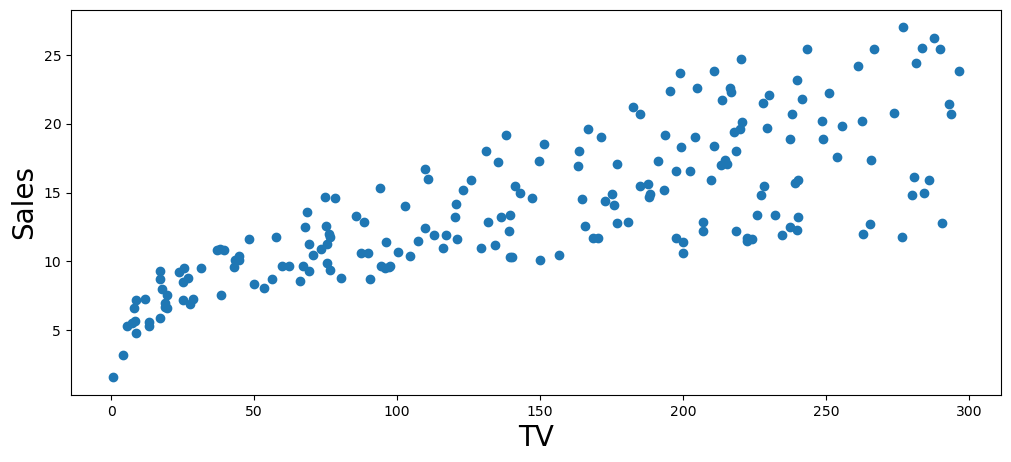

In [3]:
#Sale vs TV Advertising
plt.figure(figsize=(12,5))
plt.plot(sales['TV'],sales['Sales'],'o')
plt.xlabel('TV', fontsize=20)
plt.ylabel('Sales', fontsize=20)

Text(0, 0.5, 'Sales')

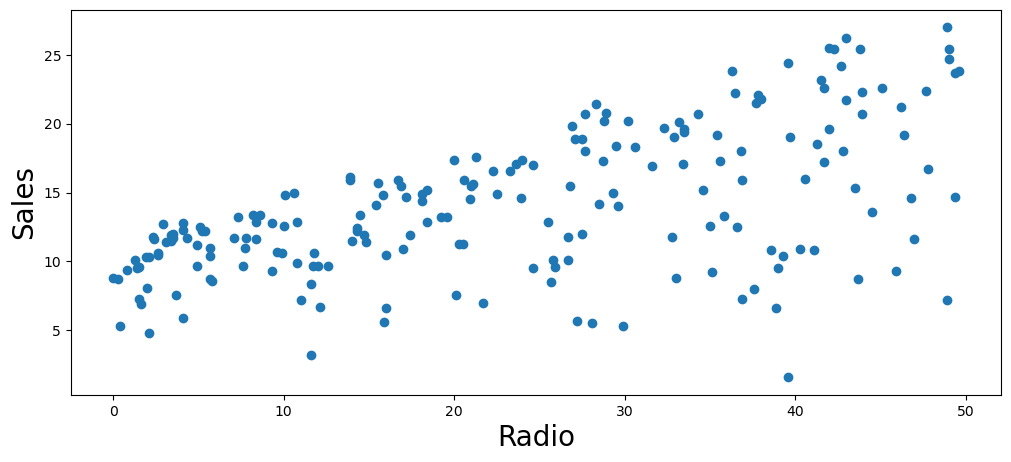

In [4]:
#Sale vs Radio Advertising
plt.figure(figsize=(12,5))
plt.plot(sales['Radio'],sales['Sales'],'o')
plt.xlabel('Radio', fontsize=20)
plt.ylabel('Sales', fontsize=20)

Text(0, 0.5, 'Sales')

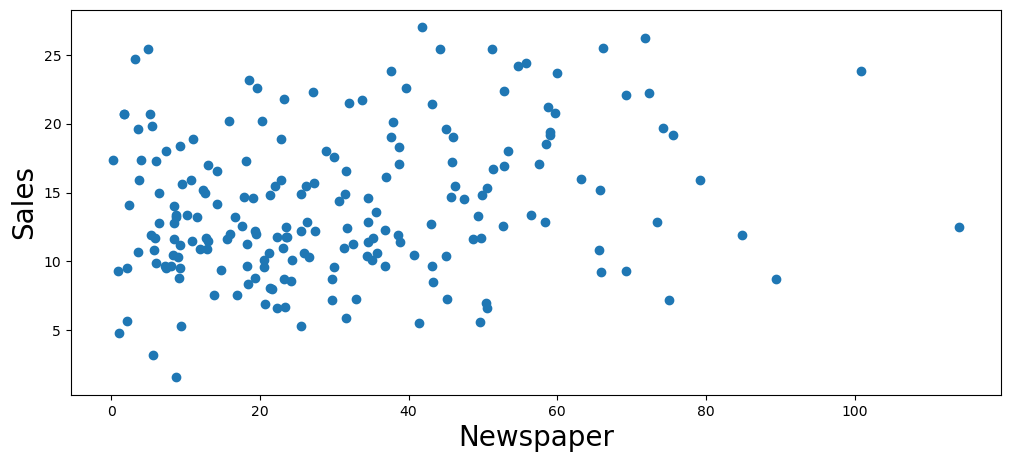

In [5]:
#Sale vs Newspaper Advertising
plt.figure(figsize=(12,5))
plt.plot(sales['Newspaper'],sales['Sales'],'o')
plt.xlabel('Newspaper', fontsize=20)
plt.ylabel('Sales', fontsize=20)

**Goal:** Train a linear model which predicts sales based on the money spent on different platforms for marketing.

$y = \theta_0 + \theta_1 \times \mathrm{TV} + \theta_2 \times \mathrm{Radio} + \theta_3 \times \mathrm{Newspaper}$

### Linear Regression in scikit-learn

In [6]:
# feature matrix X / target vector y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = sales[feature_cols]
y = sales.Sales

In [7]:
# train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
# initialize
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

### Interpreting linear regression coefficients

In [9]:
# coefficients
print(linreg.coef_)

[0.04396895 0.19867871 0.00256121]


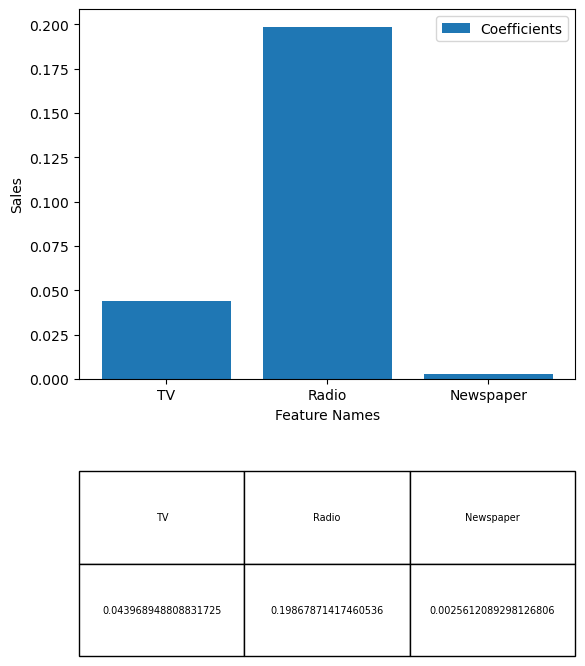

In [10]:
# pair the feature names with the coefficients
coeffs = pd.DataFrame(linreg.coef_, feature_cols, columns=['coefficient'])
plt.bar(feature_cols, linreg.coef_, label='Coefficients')
plt.legend()
plt.xlabel('Feature Names', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.table(cellText = [feature_cols, linreg.coef_],
          cellLoc = 'center', 
          rowLoc = 'center',
          loc='bottom',
          bbox=[0, -.75, 1, .5])

In [11]:
# bias term
linreg.intercept_

2.830699277304003

### Predictions

In [12]:
#predicting y_test variables
y_test_pred = linreg.predict(X_test)

array([ 7.33563082, 21.24799321, 22.94346482, 11.03185623, 16.04695548,
        6.38677583, 21.6713991 ,  9.03270052,  8.65042558, 19.68690752,
       15.14945995, 23.37266618, 20.85494349,  4.41074834, 22.05037549,
       13.07558994, 20.75971958, 16.42456394,  9.97478302,  9.44972109,
       15.73124869,  6.38057209,  8.12018671, 15.65559661, 11.69017405,
       13.37541276, 14.03411592, 11.35066589,  5.63520534, 11.95406289,
        8.84057852, 13.00629466, 12.4850064 , 17.84725664,  9.73307404,
        4.48248213, 14.31406935,  9.73291576,  9.16171775, 10.61489601,
       12.29016716,  9.52008736, 12.74802292, 20.63524545, 14.86028102,
       20.14401232, 18.76076566, 20.84782342, 21.54452421, 12.71090149])

In [13]:
#linear regression without polynomial features mean square error
lin_reg_mse = mean_squared_error(y_test, y_test_pred)
lin_reg_mse

3.311481650426958

In [14]:
#linear regression without polynomial mean absolute error
lin_reg_mae = mean_absolute_error(y_test, y_test_pred)
lin_reg_mae

1.4989491234334178

### Visualize the prediction (only for small datasets)

Text(0, 0.5, 'predicted')

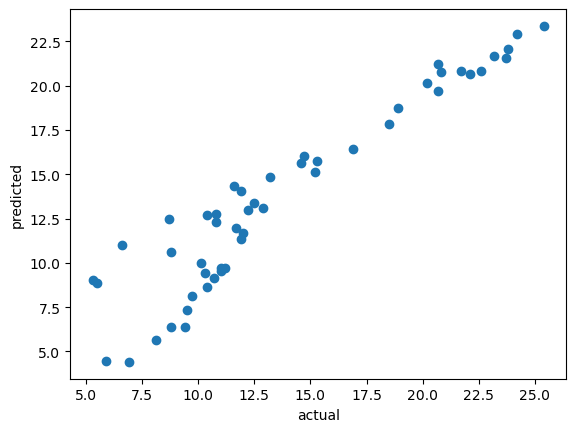

In [15]:
# plot predicted values against observed values
plt.plot(y_test, y_test_pred, 'o')
plt.xlabel('actual')
plt.ylabel('predicted')

### Adding polynomial features

In [17]:
#creating pipeline to add polynomial features
pipe = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=3,include_bias=False)),
    ('reg', linreg)
])

In [18]:
#fitting polynomial features and model
pipe.fit(X_train,y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('reg', LinearRegression())])

In [20]:
# polynomial feature names
poly_features_names = pipe['poly_features'].get_feature_names_out()
poly_features_names

array(['TV', 'Radio', 'Newspaper', 'TV^2', 'TV Radio', 'TV Newspaper',
       'Radio^2', 'Radio Newspaper', 'Newspaper^2', 'TV^3', 'TV^2 Radio',
       'TV^2 Newspaper', 'TV Radio^2', 'TV Radio Newspaper',
       'TV Newspaper^2', 'Radio^3', 'Radio^2 Newspaper',
       'Radio Newspaper^2', 'Newspaper^3'], dtype=object)

In [21]:
# pair the feature names with the coefficients
coeffs = pd.DataFrame(pipe['reg'].coef_,poly_features_names, columns=['coefficient'])
coeffs 

,coefficient
TV,9.098100e-02
Radio,5.054454e-02
Newspaper,1.876693e-02
TV^2,-4.406712e-04
TV Radio,1.317757e-03
TV Newspaper,-2.801834e-04
Radio^2,-6.931839e-04
Radio Newspaper,-1.239606e-04
Newspaper^2,2.630768e-04
TV^3,7.598158e-07


<Axes: >

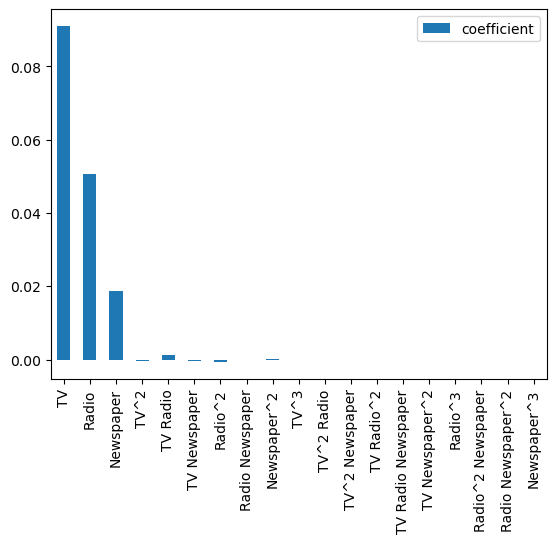

In [22]:
#plotting coefficients
coeffs.plot(kind='bar')

In [23]:
#predicting Y_test
y_test_pred = pipe.predict(X_test)

In [27]:
print('Linear regression without polynomial features mean square error is',lin_reg_mae)
print('Linear regression with polynomial features mean square error is', mean_squared_error(y_test, y_test_pred))

Linear regression without polynomial features mean square error is 1.4989491234334178
Linear regression with polynomial features mean square error is 0.27684376700498886


Text(0, 0.5, 'predicted')

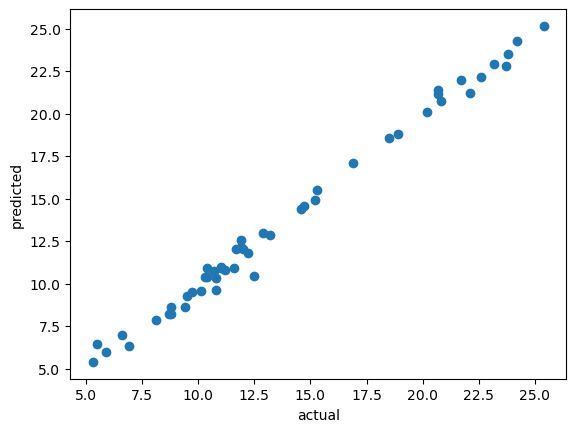

In [48]:
#ploting actual results and predicted results. Should form a diagonal line if predictions are accurate.
plt.plot(y_test, y_test_pred, 'o')
plt.xlabel('actual')
plt.ylabel('predicted')